<a href="https://colab.research.google.com/github/tarunj292/placement-project-logistic-regression/blob/master/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df = df.iloc[:,1:]

In [8]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [9]:
import matplotlib.pyplot as plt

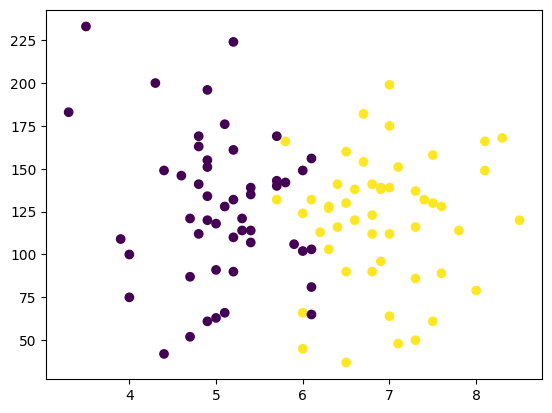

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y.shape

(100,)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
71,6.1,132.0
32,7.0,139.0
77,7.3,50.0
39,4.6,146.0
21,7.1,151.0
...,...,...
91,7.5,158.0
50,3.5,233.0
57,6.5,130.0
86,5.1,128.0


In [16]:
y_train

,placement
71,1
32,1
77,1
39,0
21,1
...,...
91,1
50,0
57,1
86,0


In [17]:
X_test

,cgpa,iq
23,4.7,87.0
0,6.8,123.0
73,4.9,61.0
42,7.6,89.0
84,5.7,169.0
48,6.6,138.0
64,7.0,64.0
30,7.6,128.0
66,6.9,96.0
25,5.0,91.0


In [18]:
y_test

,placement
23,0
0,1
73,0
42,1
84,0
48,1
64,1
30,1
66,1
25,0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[ 0.1235422 ,  0.15808255],
       [ 0.91148852,  0.33342059],
       [ 1.17413729, -1.89587736],
       [-1.18970166,  0.50875863],
       [ 0.99903811,  0.63400009],
       [-0.13910657,  1.00972446],
       [ 0.03599261, -1.49510469],
       [ 0.82393893,  0.3083723 ],
       [-0.57685453, -0.11744866],
       [-0.66440412,  0.15808255],
       [ 1.78698443, -1.1694769 ],
       [-0.66440412, -0.39297986],
       [ 0.73638934, -0.34288328],
       [ 0.29864138, -0.5683179 ],
       [-0.92705289,  0.20817913],
       [ 0.1235422 , -0.5683179 ],
       [ 0.56129015, -0.14249695],
       [ 0.1235422 , -1.11938032],
       [ 2.22473238, -0.14249695],
       [-0.75195371, -1.49510469],
       [ 0.99903811, -1.94597394],
       [-0.8395033 , -0.19259353],
       [-0.92705289,  1.76117321],
       [ 1.87453402,  1.00972446],
       [-1.01460248,  0.93457959],
       [-0.75195371,  1.26020738],
       [ 0.73638934, -0.89394569],
       [ 1.17413729, -0.24269011],
       [ 1.34923647,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[-1.10215207, -0.96909057],
       [ 0.73638934, -0.06735207],
       [-0.92705289, -1.62034615],
       [ 1.43678606, -0.91899399],
       [-0.22665616,  1.08486934],
       [ 0.56129015,  0.3083723 ],
       [ 0.91148852, -1.54520128],
       [ 1.43678606,  0.05788938],
       [ 0.82393893, -0.74365595],
       [-0.8395033 , -0.8688974 ]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()

In [32]:
#model training
clf.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_predict = clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test, y_predict)

1.0

In [39]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

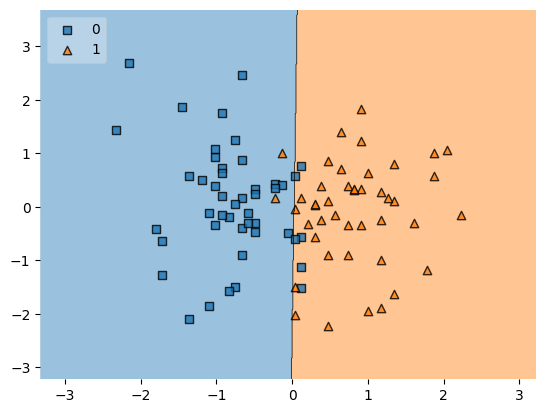

In [41]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [42]:
import pickle

In [44]:
pickle.dump(clf, open('model.pkl', 'wb'))